# Project 2

#### Importy i załadowanie danych

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/datasets/complete_tf_idf.csv')

In [ ]:
dictionary = pd.read_csv('/content/drive/MyDrive/datasets/dictionary.csv')

In [ ]:
df.head(10)

,18,19,20,34,38,39,43,45,47,51,...,46409,46894,47583,48025,48093,48269,49029,49248,49393,49524
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.023673,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df = df[df.index != 5223]

In [ ]:
df = df.drop(columns=['Unnamed: 0'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7499 entries, 0 to 7499
Columns: 4447 entries, 18 to 49524
dtypes: float64(4447)
memory usage: 254.5 MB


In [ ]:
real_labels = [*[0]*1500,*[1]*1500,*[2]*1500, *[3]*1499, *[4]*1500 ]

In [ ]:
len(real_labels)

7499

#### TSNE

Spróbujmy na początku rzutować nasze dokumenty na płaszczyznę i zobaczyć czy mamy jakieś widoczne klastry.

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE(learning_rate=500)

In [ ]:
transformed = tsne.fit_transform(df)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


In [ ]:
xs = transformed[:,0]
ys = transformed[:,1]

TSNE(learning_rate=100) : 

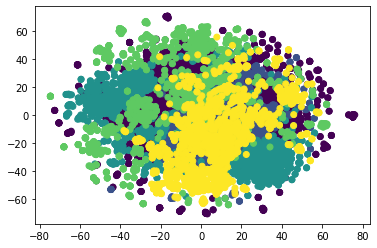

In [ ]:
plt.scatter(xs,ys,c=real_labels)
plt.show()

TSNE(learning_rate=10) :

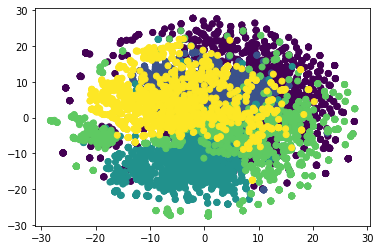

In [ ]:
plt.scatter(xs,ys,c=real_labels)
plt.show()

learning = 800

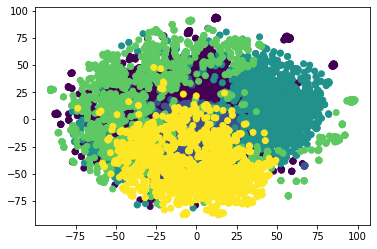

In [ ]:
plt.scatter(xs,ys,c=real_labels)
plt.show()

learning = 1000

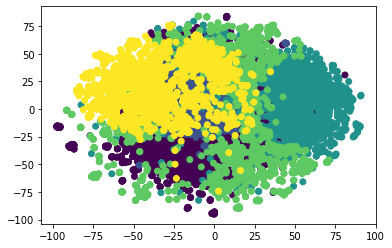

In [ ]:
plt.scatter(xs,ys,c=real_labels)
plt.show()

learning = 500

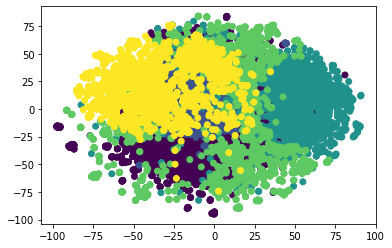

In [ ]:
plt.scatter(xs,ys,c=real_labels)
plt.show()

#### PCA 3d scatter

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=3)

In [ ]:
pca.fit(df)

PCA(n_components=3)

In [ ]:
len(pca.components_[0])

4447

In [ ]:
import plotly.express as px

In [ ]:
pca_features = pca.transform(df)

In [ ]:
pca_features[:,0]

array([-0.02899234, -0.02633784, -0.03041329, ..., -0.00945037,
       -0.01095392, -0.00520312])

In [ ]:
pca_features

array([[-0.02899234, -0.00544927,  0.00444661],
       [-0.02633784,  0.01293008,  0.00207588],
       [-0.03041329,  0.00019163,  0.00451245],
       ...,
       [-0.00945037, -0.0059972 , -0.01359621],
       [-0.01095392, -0.0110673 , -0.00773721],
       [-0.00520312, -0.01216432, -0.01205312]])

In [ ]:
fig = px.scatter_3d(df, x=pca_features[:,0], y=pca_features[:,1], z=pca_features[:,2],
              color=real_labels)
fig.show()

#### KMeans

fitujemy do df bez redukcji

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
def test_model(max_k, X):
  score = []
  for k in range(2, max_k):
        kmeans = KMeans(n_clusters=k, random_state= 101)
        predictions = kmeans.fit_predict(X)
        # Calculate cluster validation metrics and append to lists of metrics
        score.append(kmeans.score(X))
  list_title = ['Within-cluster sum of squares']#, 'Silhouette Score', 'Calinski Harabasz', 'Davies Bouldin'] 
  list_scores = [score] 
  for i in range(len(list_scores)):
      x_ticks = list(range(2, len(list_scores[i]) + 2))
      plt.plot(x_ticks, list_scores[i], 'bx-')
      plt.xlabel('k')
      plt.ylabel(list_title[i])
      plt.title('Optimal k')
      plt.show()

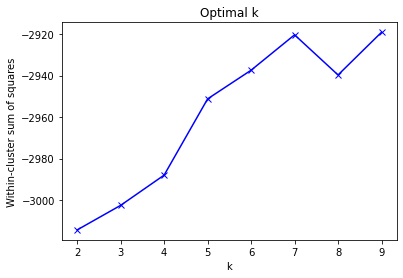

In [ ]:
test_model(10,df)

In [ ]:
model = KMeans(n_clusters=5)

In [ ]:
model.fit(df)

KMeans(n_clusters=5)

In [ ]:
labels = model.predict(df)

In [ ]:
labels_comp = pd.DataFrame(zip(list(labels), real_labels))

In [ ]:
labels_comp.columns=['labels', 'real_labels']

[enron_temp, nips_temp, kos_temp, nytimes_temp, pubmed_temp]

In [ ]:
pd.crosstab(labels_comp['labels'], labels_comp['real_labels'])

real_labels,0,1,2,3,4
labels,,,,,
0,35,0,0,0,0
1,1460,1500,1500,1499,933
2,0,0,0,0,15
3,5,0,0,0,0
4,0,0,0,0,552


#### NMF i DBscan

Najpierw redukcja

In [ ]:
nmf_features = nmf.transform(df)

In [ ]:
model.fit(nmf_features) 

KMeans(n_clusters=5)

In [ ]:
labels = model.predict(nmf_features)

In [ ]:
labels_comp = pd.DataFrame(zip(list(labels), real_labels))

In [ ]:
pd.crosstab(labels_comp[0], labels_comp[1])

1,0,1,2,3,4
0,,,,,
0,1447,1500,1500,1499,927
1,0,0,0,0,121
2,36,0,0,0,0
3,16,0,0,0,0
4,1,0,0,0,452


In [ ]:
dbscan = DBSCAN(eps=0.0085, min_samples=)

In [ ]:
dbscan.fit(nmf_features)

DBSCAN(eps=0.0085, min_samples=100)

In [ ]:
dbscan.labels_

array([-1, -1, -1, ..., -1, -1, -1])

In [ ]:
dbs_labels = list(dbscan.labels_)

In [ ]:
labels_comp = pd.DataFrame(zip(list(dbs_labels), real_labels))

In [ ]:
pd.crosstab(labels_comp[0], labels_comp[1])

1,0,1,2,3,4
0,,,,,
-1,1500,153,1500,1297,1487
0,0,1347,0,2,13
1,0,0,0,200,0


In [ ]:
dbscan2 = DBSCAN(eps=0.001, min_samples=(4447*2))

In [ ]:
dbscan2.fit(df)

DBSCAN(eps=0.001, min_samples=8894)

In [ ]:
dbs_labels = list(dbscan2.labels_)

In [ ]:
labels_comp = pd.DataFrame(zip(list(dbs_labels), real_labels))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7499 entries, 0 to 7499
Columns: 4447 entries, 18 to 49524
dtypes: float64(4447)
memory usage: 254.5 MB


##### NMF Topics

In [ ]:
nmf = NMF(10)
nmf.fit(df)

In [ ]:
nums = []
for x in list(df.columns):
  nums.append(int(x))

In [ ]:
dictionary.loc[dictionary['Unnamed: 0'].isin(nums)]['word'].reset_index(drop=True)[indexes]

2645            rat
513     cholesterol
4347    lipoprotein
2415         plasma
2576        protein
Name: word, dtype: object

In [ ]:
dictik = dictionary.loc[dictionary['Unnamed: 0'].isin(nums)]['word'].reset_index(drop=True)
def displayMostPopularWords(component):
  indexes = list(pd.DataFrame(zip(component, [x for x in range(len(component))])).sort_values(0, ascending=False).head(10)[1])
  return dictik[indexes]
  

In [ ]:
displayMostPopularWords(nmf.components_[0])

2645              rat
513       cholesterol
4347      lipoprotein
2415           plasma
2576          protein
47           activity
1905            liver
4352            serum
645     concentration
4339           enzyme
Name: word, dtype: object

In [ ]:
for component in nmf.components_:
  print(displayMostPopularWords(component), '\n')

2645              rat
513       cholesterol
4347      lipoprotein
2415           plasma
2576          protein
47           activity
1905            liver
4352            serum
645     concentration
4339           enzyme
Name: word, dtype: object 

2774       request
2789      resource
546          click
170       approval
2372     permanent
14      acceptance
73           admin
827           date
2836          risk
784         create
Name: word, dtype: object 

404         bush
1808       kerry
2440        poll
2200    november
2958      senate
1759        iraq
2141       nader
424     campaign
1575       house
3590         war
Name: word, dtype: object 

4444        thin-layer
4338    chromatography
2974        separation
4443            sterol
1382          fraction
2607      quantitative
1765         isolation
2971         separated
255          automated
583             column
Name: word, dtype: object 

32             acid
4186      synthesis
4349      oxidation
2485    preparatio

#### Clustering function

In [ ]:
kmeans = KMeans(8)
kmeans.fit(df)
labels = kmeans.predict(df)

In [ ]:
df2 = df.copy()

In [ ]:
df2['label'] = labels

In [ ]:
df = df.drop(columns=['label'])

In [ ]:
df2.columns

Index(['18', '19', '20', '34', '38', '39', '43', '45', '47', '51',
       ...
       '46894', '47583', '48025', '48093', '48269', '49029', '49248', '49393',
       '49524', 'label'],
      dtype='object', length=4448)

In [ ]:
df2.loc[df2['label']==3].loc[0,:]

18       0.0
19       0.0
20       0.0
34       0.0
38       0.0
        ... 
49029    0.0
49248    0.0
49393    0.0
49524    0.0
label    3.0
Name: 0, Length: 4448, dtype: float64

In [ ]:
[int(x) for x in list(df.idxmax(axis=1))]

TypeError: ignored

In [ ]:
[int(x) for x in list(df.max().nlargest(20).index)]

[10560,
 14428,
 27933,
 11714,
 21219,
 44206,
 2238,
 15175,
 49248,
 24095,
 28228,
 18033,
 7707,
 11644,
 46113,
 26290,
 4460,
 6667,
 23889,
 27939]

In [ ]:
dictionary.loc[dictionary['Unnamed: 0']==4431]

,Unnamed: 0,word
4431,4431,diagnostic


In [ ]:
for x in df2.loc[df2['label']==3]:
  print(x)

In [ ]:
def wordsForCluster(labels):
  for label in pd.unique(labels):
    print('Słowa spod labelu : ', label)
    print(dictionary[dictionary['Unnamed: 0'].isin([int(x) for x in list(df.loc[labels==label].max().nlargest(10).index)])], '\n')

In [ ]:
kmeans.fit(df)

KMeans()

In [ ]:
labels = kmeans.predict(df)

In [ ]:
wordsForCluster(labels)

Słowa spod labelu :  1
       Unnamed: 0      word
873           873    arnold
2823         2823     click
7608         7608   houston
7707         7707       ice
9373         9373       lot
11714       11714     pitch
13270       13270  reported
14335       14335     sheet
16359       16359    trader
17820       17820       yes 

Słowa spod labelu :  2
       Unnamed: 0          word
2238         2238         canal
10560       10560     newspaper
11714       11714         pitch
14428       14428     showtimes
15175       15175           std
21219       21219  neuroscience
24095       24095       herseth
27933       27933           fff
28228       28228           fxf
44206       44206    amino_acid 

Słowa spod labelu :  3
       Unnamed: 0          word
796           796      approval
2574         2574         chart
6843         6843        global
8506         8506          jeff
10441       10441   natural_gas
11015       11015  organization
11618       11618       phillip
13293      